In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../input/cardata1/car_data.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [13]:
x = df.drop("Purchased",axis=1)
x

,User ID,Gender,Age,AnnualSalary
0,385,1,35,20000
1,681,1,40,43500
2,353,1,49,74000
3,895,1,40,107500
4,661,1,25,79000
...,...,...,...,...
995,863,1,38,59000
996,800,0,47,23500
997,407,0,28,138500
998,299,0,48,134000


In [14]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,User ID,Gender,Age,AnnualSalary
993,476,0,54,136500
859,586,0,41,67500
298,179,1,50,29500
553,526,1,20,86000
672,530,1,27,31500
...,...,...,...,...
647,538,1,33,31000
190,264,1,51,143500
361,970,0,34,70500
664,307,1,29,80500


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [17]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(random_state =0)
ml.fit(train_X,train_y)

LogisticRegression(random_state=0)

In [18]:
y_pred = ml.predict( test_X)
print(y_pred )

[1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 

Text(0.5, 1.0, 'Actual vs predicted')

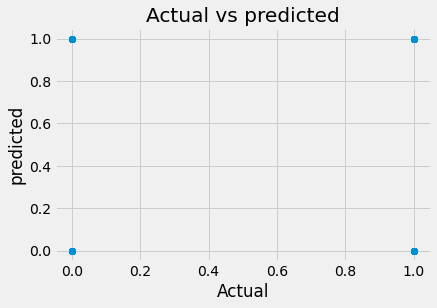

In [19]:
plt.scatter(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred ,test_y)

0.83

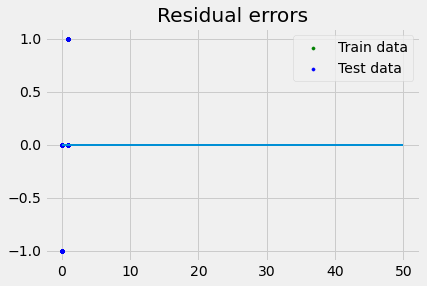

In [21]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(ml.predict(train_X), ml.predict(train_X) - train_y,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(ml.predict(test_X), ml.predict(test_X) - test_y,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()